# Dataset summary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the dataset to pandas dataframe
df = pd.read_csv('./dataset/day.csv')


In [4]:
#Shape of the dataset
df.shape

(731, 16)

In [5]:
#Glimpse of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#Basic info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Summary statistics of the dataset 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Data preprocessing

In [8]:
columns = ['dteday', 'holiday', 'casual', 'registered']
df.drop(columns, axis=1, inplace=True)
df.shape

(731, 12)

In [9]:
#Dropping duplicate rows if any
df = df.drop_duplicates(keep='first')
df.head()

,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [10]:
#Missing value analysis
null_data = df[df.isna().any(axis=1)]
null_data

,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [11]:
#Using instant as index

df = df.set_index('instant')
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
3,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
4,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
5,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


# Exploratory data analysis

## Visualisation of numerical variables

(array([ 13.,  62.,  71.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([  22. ,  891.2, 1760.4, 2629.6, 3498.8, 4368. , 5237.2, 6106.4,
        6975.6, 7844.8, 8714. ]),
 <a list of 10 Patch objects>)

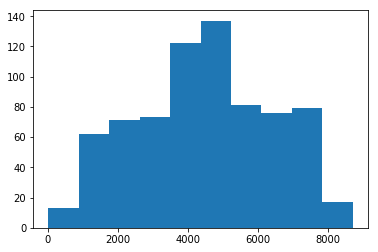

In [12]:
#Histogram for contineous numerical values
num_bins = 10
plt.hist(df['cnt'], num_bins)

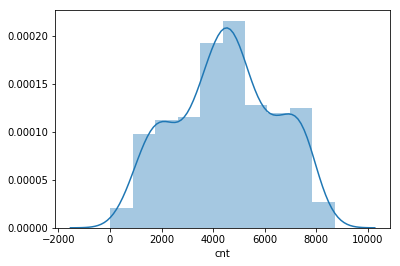

In [13]:
#Plotting distribution function
num_bins = 10
sns.distplot(df['cnt'], num_bins)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6807063550>,
      dtype=object)

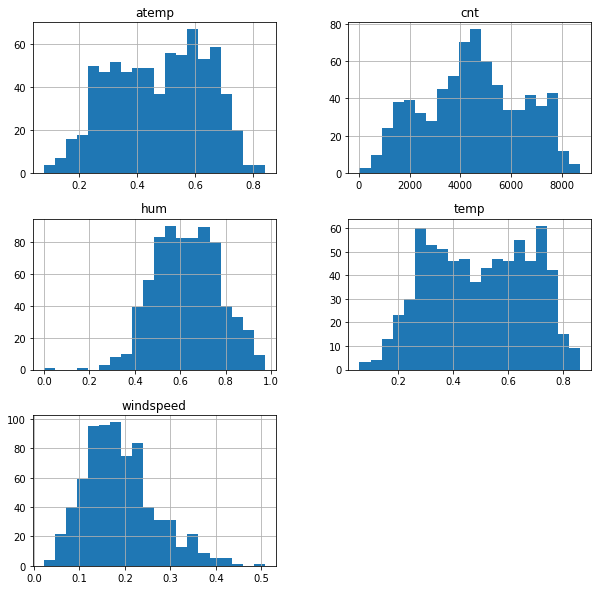

In [14]:
num_columns = ['temp','atemp','hum','windspeed', 'cnt']
df_numerical = df[num_columns]
df.hist(num_columns, figsize=(10,10), bins=20)

## Visualising count vs (Month, season, weekday, year, workingday)

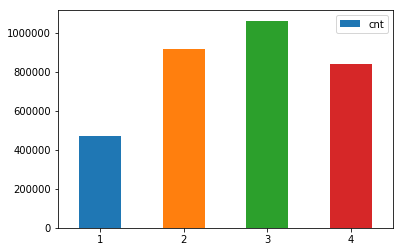

In [15]:
#Box-plot for categorical variable 
df_season = df.groupby(['season']).agg({'cnt':'sum'})
df_season.plot.bar(x=df_season.index.values, y='cnt', rot=0)
#box1 = sns.boxplot(x='season', y='cnt')
# 1:springer, 2:summer, 3:fall, 4:winter

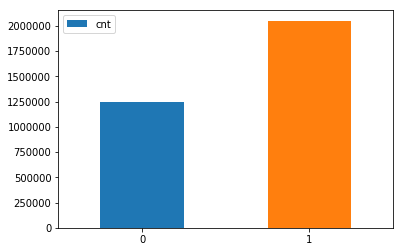

In [16]:
#Year 0:2011 1:2012
df_year = df.groupby(['yr']).agg({'cnt':'sum'})
df_year.plot.bar(x=df_year.index.values, y='cnt', rot=0)

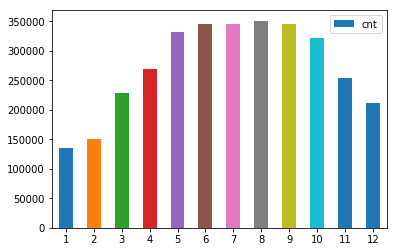

In [17]:
#Months from Jab to December
df_month = df.groupby(['mnth']).agg({'cnt':'sum'})
df_month.plot.bar(x=df_month.index.values, y='cnt', rot=0)

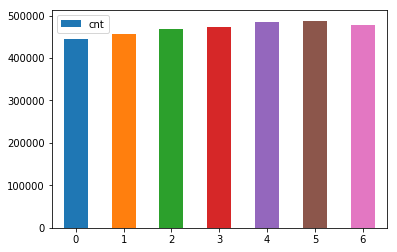

In [18]:
#Weekday Day of the week
df_weekday = df.groupby(['weekday']).agg({'cnt':'sum'})
df_weekday.plot.bar(x=df_weekday.index.values, y='cnt', rot=0)

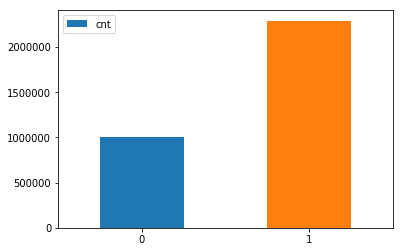

In [19]:
# Working day 1: neither weekend nor holiday 0: otherwise
df_workingday = df.groupby(['workingday']).agg({'cnt':'sum'})
df_workingday.plot.bar(x=df_workingday.index.values, y='cnt', rot=0)


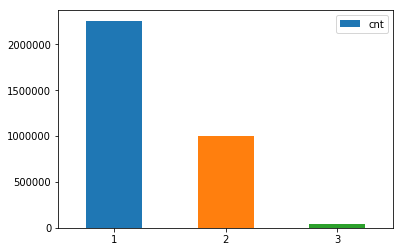

In [20]:
# Weathersit
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df_weathersit = df.groupby(['weathersit']).agg({'cnt':'sum'})
df_weathersit.plot.bar(x=df_weathersit.index.values, y='cnt', rot=0)

## Corrolation analysis

temp         0.627494
atemp        0.631066
hum         -0.100659
windspeed   -0.234545
Name: cnt, dtype: float64


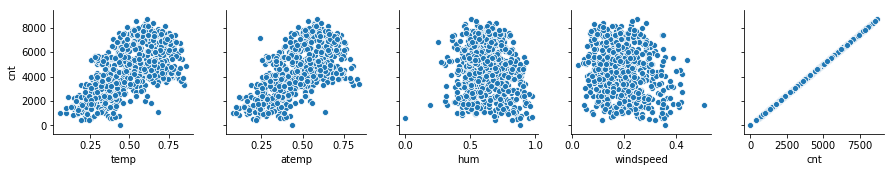

In [21]:
#Correlation with the target variable
corrolation = df_numerical.corr()['cnt'][:-1]
print(corrolation)
#Plotting corrolation plot using pairplot
for i in range(0, len(df_numerical.columns), 5):
    sns.pairplot(df_numerical, y_vars=['cnt'], x_vars=df_numerical.columns[i:i+5])

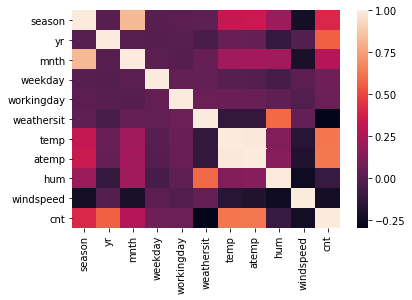

In [22]:

sns.heatmap(df.corr())

# Model building

## Linear Regression

In [23]:
#Dropping columns windspead and weather and season
#unimportant_columns = ['weathersit', 'hum', 'windspeed']
#df = df.drop(unimportant_columns, axis=1)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pickle

In [25]:

df = shuffle(df)
data = df.drop(['cnt'], axis=1)
target =  df['cnt']

In [26]:
def rmse(y_actual, y_pred):
    rms = sqrt(mean_squared_error(y_actual, y_pred))
    return rms

def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))


def print_evaluation_results(actual, predicted):
    print(' Test RMSE: {}'.format(rmse(actual, predicted)))
    print(' Test RMSLE: {}'.format(rmsle(actual, predicted)))
    print(' R squared score: {}'.format(r2_score(actual, predicted)))
    print( 'Mean absolute error: {}'.format(mean_absolute_error(actual, predicted)))


In [27]:
#Initialising the Linear regression model
model = LinearRegression()

# Splitting the data into train and test.
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

#Train model
model.fit(X= x_train, y=y_train)

# Make predictions on test data
y_pred = model.predict(X=x_test)
print_evaluation_results(y_test, y_pred)


 Test RMSE: 928.263838314
 Test RMSLE: 0.313884893173
 R squared score: 0.779600200968
Mean absolute error: 662.24822139


## Improving the model

### Using cross validation

In [28]:
#Initialising the Linear regression model
model = LinearRegression()
#Train model
kf = KFold(n_splits=10)
model = LinearRegression()
r_squared_score = []
rmsle_score = []
mae = []
for train, test in kf.split(df):
    x_train, y_train = data.iloc[train], target.iloc[train]
    x_test, y_test = data.iloc[test], target.iloc[test]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r_squared_score.append(r2_score(y_test, y_pred))
    rmsle_score.append(rmsle(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))
    

#Evaluation
print('Mean r2 score: {}'.format(np.mean(r_squared_score)))
print('Mean rmsle score: {}'.format(np.mean(rmsle_score)))
print(' Mean absolute error: {}'.format(np.mean(mae)))


Mean r2 score: 0.778962875054
Mean rmsle score: 0.347424823055
 Mean absolute error: 660.733641444


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


### Using regularization

In [29]:
# Splitting the data into train and test.
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2)

#Model
lasso_m_ = Lasso()

#Hyper parameters
alpha  = [0.001, 0.005, 0.01 ,0.1, 0.2, 0.3, 0.5, 0.7, 1]
lasso_params_ = { 'max_iter':[500],'alpha':alpha}

#Evaluation measure
evaluation_measure = make_scorer(rmsle, greater_is_better=False)
grid_lasso = GridSearchCV( lasso_m_,
                          lasso_params_,
                          scoring = evaluation_measure,
                          cv=20)

grid_lasso.fit(X = x_train,y = y_train)
y_pred = grid_lasso.predict(X= x_test)
print (grid_lasso.best_params_)
print_evaluation_results(y_test, y_pred)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'alpha': 1, 'max_iter': 500}
 Test RMSE: 880.662085032
 Test RMSLE: 0.253304756318
 R squared score: 0.795995448666
Mean absolute error: 644.610303787


### Using Ensemble methods

In [32]:
# Splitting the data into train and test.
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2)

#Model initialisation
model = RandomForestRegressor(n_estimators=100)
#Model

#Hyper parameters
n_estimators = [50, 100, 200, 300]

parameters = { 'n_estimators':[50, 100, 200, 300],'max_features': [2, 3, 4, 5, 6]}

#Evaluation measure
evaluation_measure = make_scorer(rmsle, greater_is_better=False)
grid_random_forest = GridSearchCV( model,
                          parameters,
                          scoring = evaluation_measure,
                          cv=10)

grid_random_forest.fit(X = x_train,y = y_train)
y_pred = grid_random_forest.predict(X= x_test)
print (grid_random_forest.best_params_)
print_evaluation_results(y_test, y_pred)

# Save model
file_name = 'randome_forest.sav'
pickle.dump(grid_random_forest, open(file_name, 'w'))

{'max_features': 4, 'n_estimators': 100}
 Test RMSE: 630.538260053
 Test RMSLE: 0.249573665485
 R squared score: 0.897920017121
Mean absolute error: 460.752857143


In [31]:
print('Mean absolute deviation on predictions : {}'.format(pd.Series(y_pred).mad()))
print('Mean absolute deviation on actuals: {}'.format(pd.Series(y_test).mad()))

Mean absolute deviation on predictions : 1389.31505345
Mean absolute deviation on actuals: 1531.0603915
